In [2]:
import pandas as pd

data = pd.read_csv('data/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/label_final.csv', index_col=0)
data_std = pd.read_csv('data/dataframe_std.csv', index_col=0)

In [37]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        X = dataframe.loc[dayformat].values
        y = label.loc[dayformat].values
        
        s = np.arange(X.shape[0])
        np.random.shuffle(s)
        X = X[s]
        y = y[s]
        
        Xs.append(X)
        ys.append(y)
        if idx != dayformat:
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [38]:
X, y = create_sequences(1963, data, label)
X.shape, y.shape

((313187,), (313187,))

In [39]:
stdX, y = create_sequences(1963, data_std, label)
stdX.shape, y.shape

((313187,), (313187,))

In [40]:
def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [42]:
X = sequenceFlatter(X)
stdX = sequenceFlatter(stdX)
y = sequenceFlatter(y)



KeyboardInterrupt: 

In [53]:
X.shape

(31317413, 11)

In [52]:
from pprint import pprint
len(X) - len(np.unique(X, axis=0))

31016746

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_std, X_test_std, y_train, y_test = train_test_split(stdX, y, test_size=0.2, shuffle=False)


[4.77523332e+06 2.16880228e+06 7.84758818e+05 2.44215234e+05
 1.14564929e+05 6.77047150e+04 5.05495013e+04 4.62069058e+04
 2.13021701e+04 1.00388504e+04 2.18984010e-01]
[5.76483885e-01 2.61825859e-01 9.47389963e-02 2.94825692e-02
 1.38307033e-02 8.17356441e-03 6.10252336e-03 5.57826912e-03
 2.57167702e-03 1.21192727e-03 2.64365622e-08]


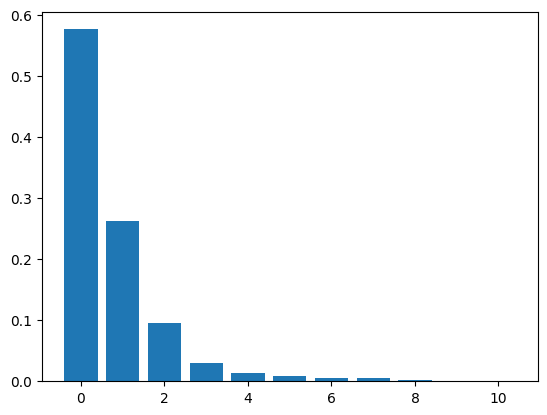

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

x_length = len(X_train[0])
x = np.arange(x_length)

import matplotlib.pyplot as plt 

plt.bar(x, pca.explained_variance_ratio_)
plt.show()

[3.18928638 1.64874252 1.13681135 0.92976387 0.86934899 0.77276901
 0.74060811 0.67904148 0.56807077 0.47278501 0.25480701]
[0.28318919 0.14639828 0.10094192 0.08255736 0.07719289 0.06861718
 0.06576148 0.06029474 0.05044122 0.04198043 0.02262531]


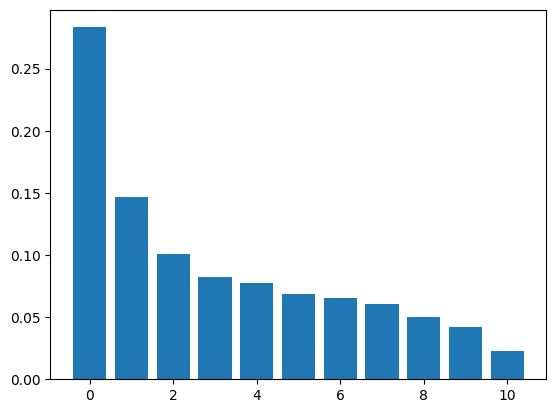

In [10]:
pca_std = PCA()
pca_std.fit(X_train_std)

print(pca_std.explained_variance_)
print(pca_std.explained_variance_ratio_)

plt.bar(x, pca_std.explained_variance_ratio_)
plt.show()

In [11]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_std_pca = pca_std.fit_transform(X_train_std)
X_test_std_pca = pca_std.transform(X_test_std)

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.45890351 0.0900883  0.07685359 0.07337496 0.0658457  0.0613124
 0.05038525 0.04717106 0.03990799 0.03224516 0.00391207]


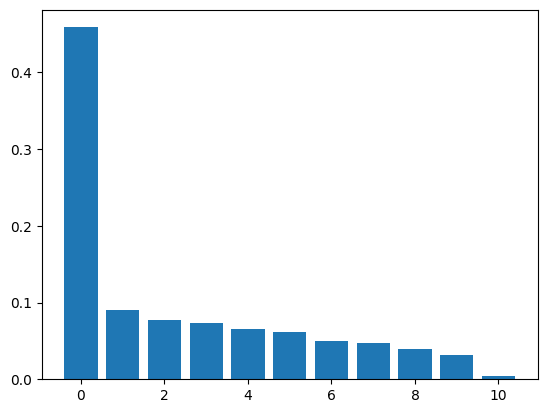

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print(lda.explained_variance_ratio_)

plt.bar(x, lda.explained_variance_ratio_)
plt.show()

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9.93707285e-01 3.34216079e-03 8.85325694e-04 5.01025610e-04
 4.18919283e-04 3.02645068e-04 2.65126410e-04 2.24060265e-04
 1.84258897e-04 1.53536523e-04 1.56569007e-05]


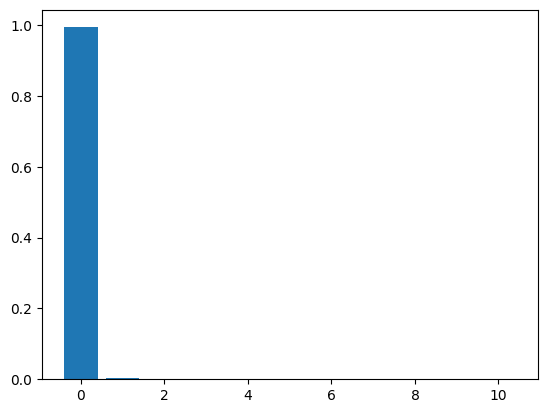

In [13]:
lda_std = LinearDiscriminantAnalysis()
lda_std.fit(X_train_std, y_train)
print(lda_std.explained_variance_ratio_)

plt.bar(x, lda_std.explained_variance_ratio_)
plt.show()

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.45890351 0.0900883  0.07685359 0.07337496 0.0658457  0.0613124
 0.05038525 0.04717106 0.03990799 0.03224516 0.00391207]


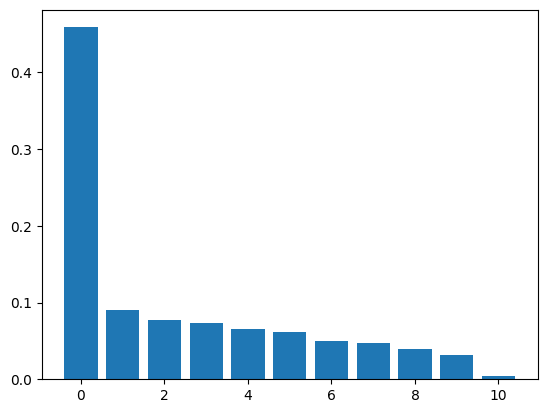

In [14]:
lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(X_train_pca, y_train)
print(lda_pca.explained_variance_ratio_)

plt.bar(x, lda_pca.explained_variance_ratio_)
plt.show()

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9.93707285e-01 3.34216079e-03 8.85325694e-04 5.01025610e-04
 4.18919283e-04 3.02645068e-04 2.65126410e-04 2.24060265e-04
 1.84258897e-04 1.53536523e-04 1.56569007e-05]


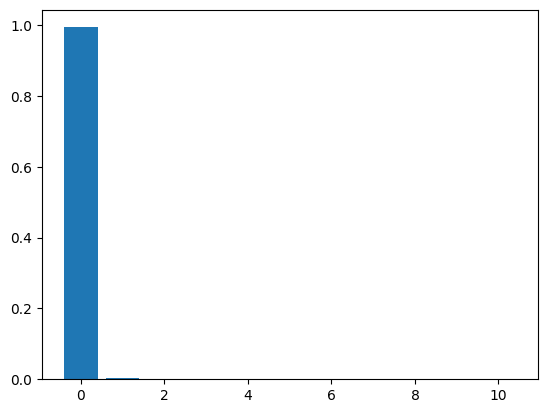

In [15]:
lda_std_pca = LinearDiscriminantAnalysis()
lda_std_pca.fit(X_train_std_pca, y_train)
print(lda_std_pca.explained_variance_ratio_)

plt.bar(x, lda_std_pca.explained_variance_ratio_)
plt.show()

In [16]:
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

X_train_std_lda = lda_std.transform(X_train_std)
X_test_std_lda = lda_std.transform(X_test_std)

X_train_pca_lda = lda_pca.transform(X_train_pca)
X_test_pca_lda = lda_pca.transform(X_test_pca)

X_train_std_pca_lda = lda_std_pca.transform(X_train_std_pca)
X_test_std_pca_lda = lda_std_pca.transform(X_test_std_pca)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

def modelingAndVisualizing(X_train, X_test, title):
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print('검증 정확도 : ', round(test_score, 3))
    print("평균 정확도", np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    
    plt.plot(range(100), y_test[:100], label='True')
    plt.plot(range(100), y_pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

Standardized
학습 정확도 :  0.658
검증 정확도 :  -0.578
평균 정확도 -0.5384715481416904


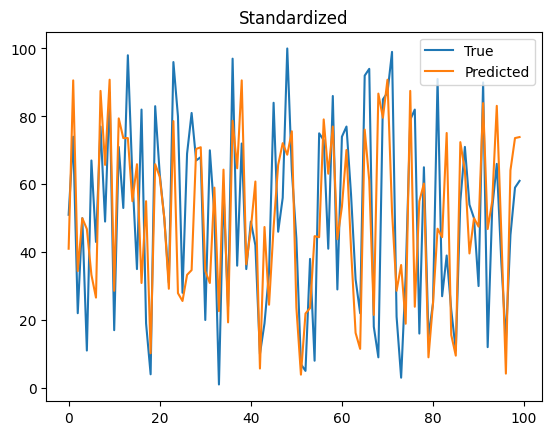

Standardized_PCA
학습 정확도 :  0.657
검증 정확도 :  -0.578
평균 정확도 -0.5384295096843412


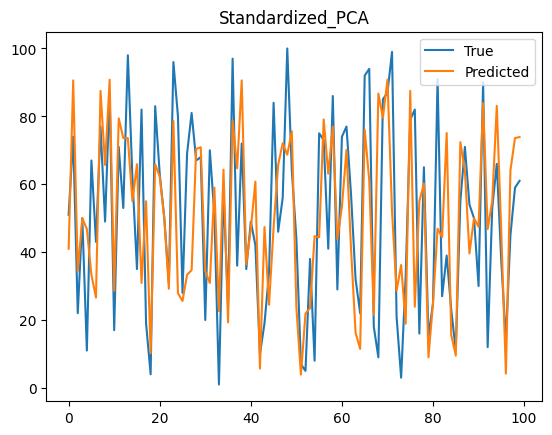

Standardized_LDA
학습 정확도 :  0.656
검증 정확도 :  -0.577
평균 정확도 -0.5518166105679017


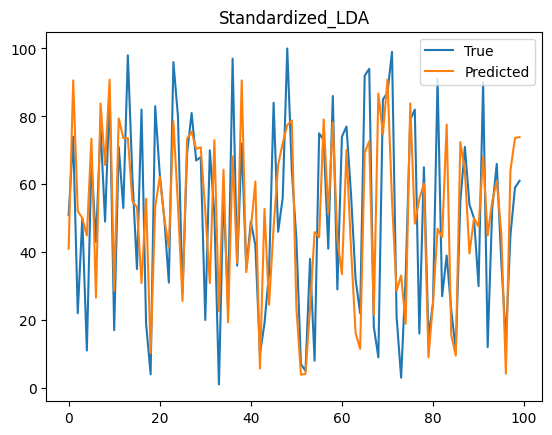

Standardized_PCA_LDA
학습 정확도 :  0.656
검증 정확도 :  -0.577
평균 정확도 -0.5518166105679017


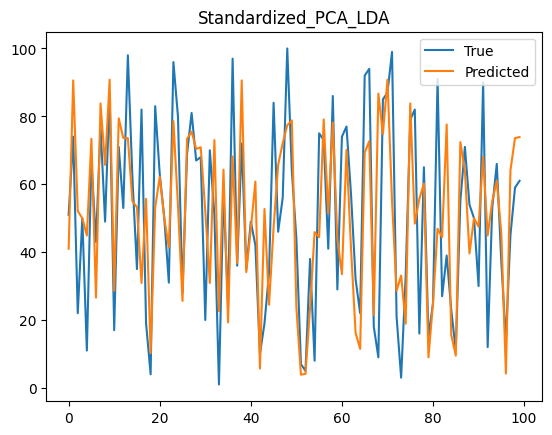

In [30]:
modelingList = [
    (X_train_std, X_test_std, 'Standardized'),
    (X_train_std_pca, X_test_std_pca, 'Standardized_PCA'),
    (X_train_std_lda, X_test_std_lda, 'Standardized_LDA'),
    (X_train_std_pca_lda, X_test_std_pca_lda, 'Standardized_PCA_LDA')
]

import joblib
import os

for model in modelingList:
    knn = modelingAndVisualizing(*model)
    # save model to file
    if not os.path.exists('models'):
        os.makedirs('models')
        filePath = 'models/' + model[2] + '.pkl'
        joblib.dump(knn, filePath)
    

In [18]:


data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [19]:
data2023['date'] = data2023['date'] + 835
data2023

date  danceability  energy  loudness  mode  speechiness  \
2023-01-01   835            12     206       574     1          106   
2023-01-01   835           173      97       666     1          172   
2023-01-01   835           300      74       652     1           91   
2023-01-01   835           283     100        47     1           34   
2023-01-01   835           240      50        49     1           43   
...          ...           ...     ...       ...   ...          ...   
2023-12-31   887           187     381       100     1          247   
2023-12-31   887           262     361       196     0          319   
2023-12-31   887            92     331       273     1           38   
2023-12-31   887           344     427       253     0          125   
2023-12-31   887           237     162       676     0          329   

            acousticness  instrumentalness  liveness  valence  tempo  
2023-01-01           333                 0        31      173    414  
2023-01-01           524                 0       358      463    547  
2023-01-01           527                 0        21      430    113  
2023-01-01           350               199       327      476     42  
2023-01-01           514                 0        41      466    322  
...                  ...               ...       ...      ...    ...  
2023-12-31           223                 0       317      404    416  
2023-12-31           189                 0       318      434     30  
2023-12-31           311                22       158      240    393  
2023-12-31           347               142       176      475    167  
2023-12-31           192               308       350       47    436  

[5300 rows x 11 columns]

In [20]:
X2023, y2023 = create_sequences(2023, data2023, label2023)
X2023 = X2023.reshape(X2023.shape[0]*X2023.shape[1], X2023.shape[2])
y2023 = y2023.reshape(y2023.shape[0]*y2023.shape[1], 1)

In [21]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X2023_std = std.transform(X2023)

In [22]:
X2023_pca = pca.transform(X2023)
X2023_std_pca = pca_std.transform(X2023_std)
X2023_lda = lda.transform(X2023)
X2023_std_lda = lda_std.transform(X2023_std)
X2023_pca_lda = lda_pca.transform(X2023_pca)
X2023_std_pca_lda = lda_std_pca.transform(X2023_std_pca)

In [23]:
list2023 = [
    (X2023_std, 'Standardized'),
    (X2023_std_pca, 'Standardized_PCA'),
    (X2023_std_lda, 'Standardized_LDA'),
    (X2023_std_pca_lda, 'Standardized_PCA_LDA')
]

import joblib

filePath = f'models/KNN_{list2023[0][1]}.pkl'
model = joblib.load(filePath)
print(list2023[0][1])

y_pred = model.predict(list2023[0][0])
print('정확도 : ', model.score(list2023[0][0], y2023))
plt.plot(range(100), y2023[:100], label='True')
plt.plot(range(100), y_pred[:100], label='Predicted')
plt.title(list2023[0][1])
plt.legend()
plt.show()

Standardized


AttributeError: 'NoneType' object has no attribute 'predict'

In [25]:
def modelingAndVisualizing2023(X_train, y_train, data, label, title):
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)
    pred = knn.predict(data)
    
    train_score = knn.score(X_train, y_train)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print("평균 예측 정확도", np.mean(cross_val_score(knn, data, label, cv=5)))
    
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

In [29]:
listFor2023 = [
    (X_train, y_train, X2023, y2023, 'Original'),
    (X_train_std, y_train, X2023_std, y2023, 'Standardized'),
    (X_train_pca, y_train, X2023_pca, y2023, 'PCA'),
    (X_train_std_pca, y_train, X2023_std_pca, y2023, 'Standardized_PCA'),
    (X_train_lda, y_train, X2023_lda, y2023, 'LDA'),
    (X_train_std_lda, y_train, X2023_std_lda, y2023, 'Standardized_LDA'),
    (X_train_pca_lda, y_train, X2023_pca_lda, y2023, 'PCA_LDA'),
    (X_train_std_pca_lda, y_train, X2023_std_pca_lda, y2023, 'Standardized_PCA_LDA')
]

Original
학습 정확도 :  0.313
평균 예측 정확도 0.29202133048136647


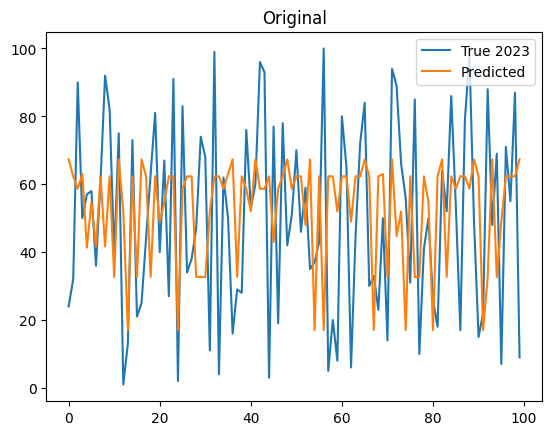

Standardized
학습 정확도 :  0.956
평균 예측 정확도 0.3286200304739844


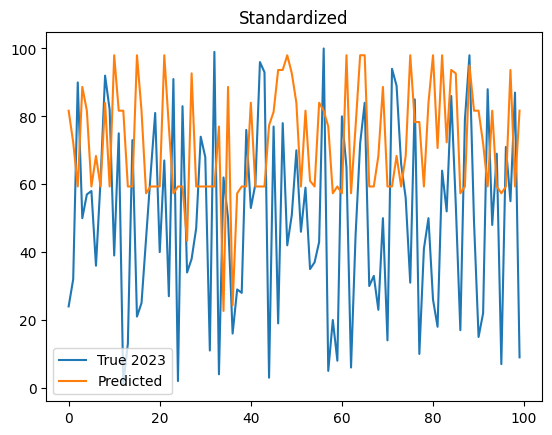

PCA
학습 정확도 :  0.313
평균 예측 정확도 0.2919965916026911


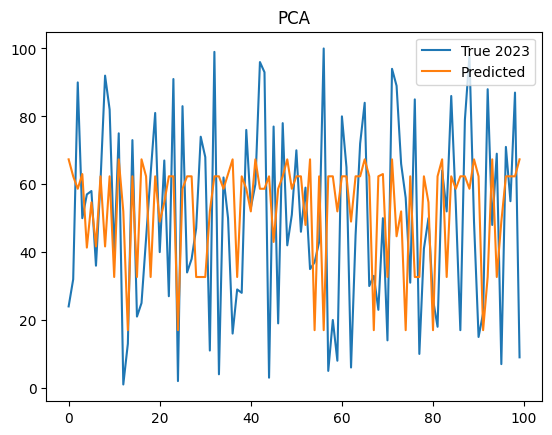

Standardized_PCA
학습 정확도 :  0.957
평균 예측 정확도 0.32953618579174204


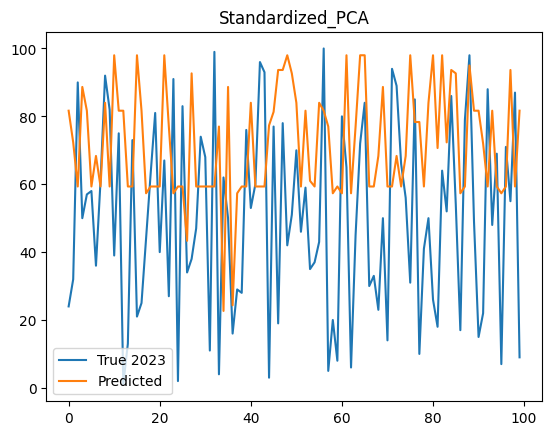

LDA
학습 정확도 :  0.313
평균 예측 정확도 0.35769769728085155


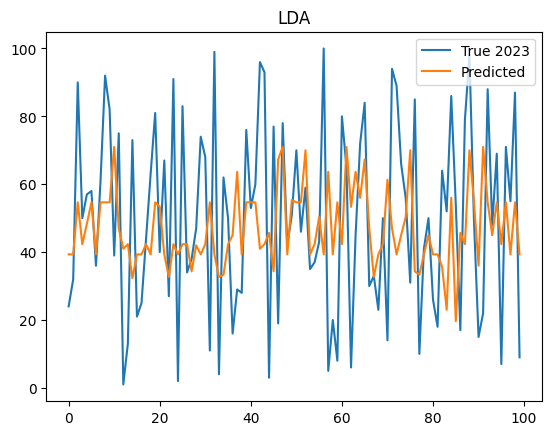

Standardized_LDA
학습 정확도 :  0.957
평균 예측 정확도 0.35947069033688156


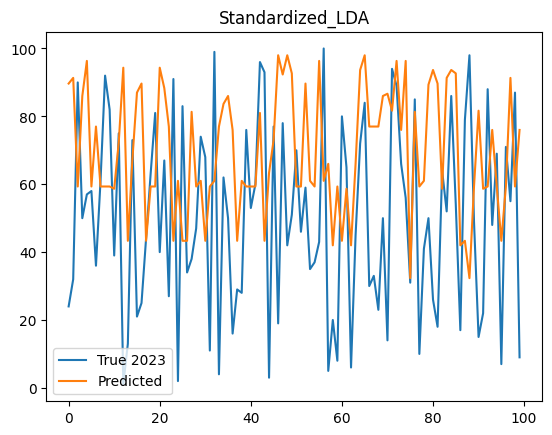

PCA_LDA
학습 정확도 :  0.313
평균 예측 정확도 0.35661955761535885


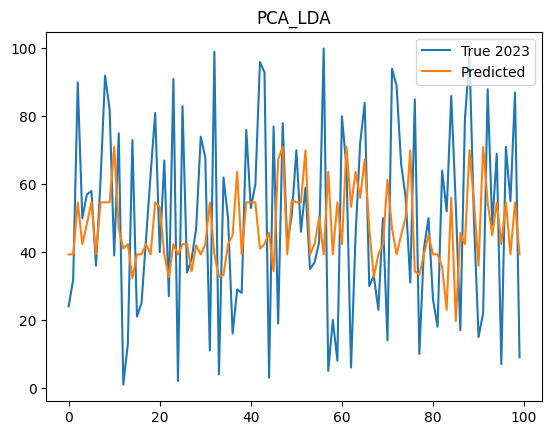

Standardized_PCA_LDA
학습 정확도 :  0.957
평균 예측 정확도 0.35909798066824283


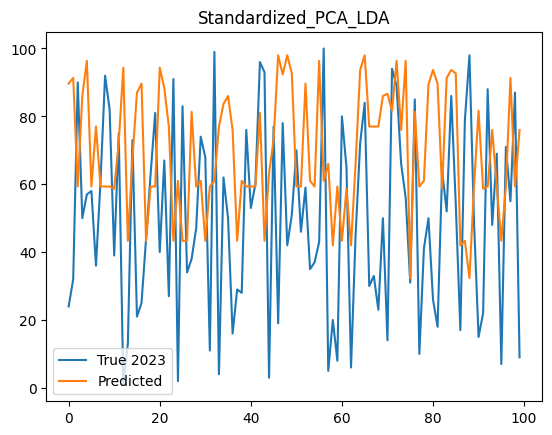

In [30]:
for model in listFor2023:
    modelingAndVisualizing2023(*model)

In [36]:
# GridSearchCV로 KNN의 최적 파라미터 찾기
# 최적 모델 선정 후 models/best_KNN.pkl로 저장
# 최적 모델로 2023년 데이터 예측 후 시각화

from sklearn.model_selection import GridSearchCV

def getBestKNN(X_train, X_test, title):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [2,3,4,5,6,7,8,9,10],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski','euclidean','manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10,20,30,40,50,60,70,80,90,100],
        'p': [1,2]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print(title)
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

knnList = [
    (X_train_std, X_test_std, 'Standardized'),
    (X_train_std_lda, X_test_std_lda, 'Standardized_LDA'),
]

list2023 = [
    (X2023_std, 'Standardized'),
    (X2023_std_lda, 'Standardized_LDA'),
]

# modelingList의 데이터로 학습한 최적 모델로 list2023의 데이터들로 2023년 데이터 예측
def predict2023(model, data, label, title):
    pred = model.predict(data)
    
    print(title)
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    
for knn, model in zip(knnList, list2023):
    bestModel = getBestKNN(*knn)
    predict2023(bestModel, model[0], y2023, model[1])

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
              

KeyboardInterrupt: 

In [31]:
def modelingAndVisualizing2023(X_train, X_test, title, data, label, n_neighbors, metric='minkowski'):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    test = knn.predict(X_test)
    pred = knn.predict(data)
    
    train_score = knn.score(X_train, y_train)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print("평균 예측 정확도", np.mean(cross_val_score(knn, data, label, cv=5)))
    
    plt.plot(range(100), y_test[:100], label='True Test')
    plt.plot(range(100), test[:100], label='Predicted')
    plt.title("Test " + title)
    plt.legend()
    plt.show()
    
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

Standardized
학습 정확도 :  0.656
평균 예측 정확도 0.23152979807261787


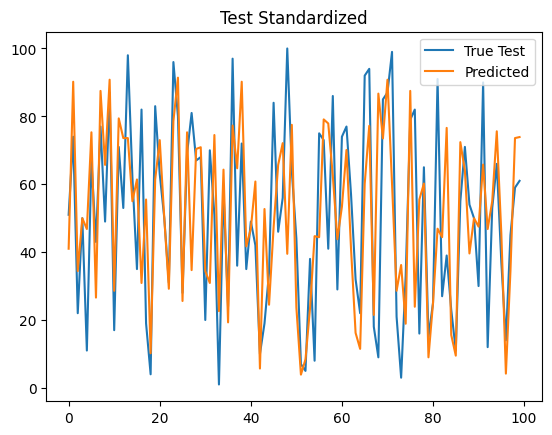

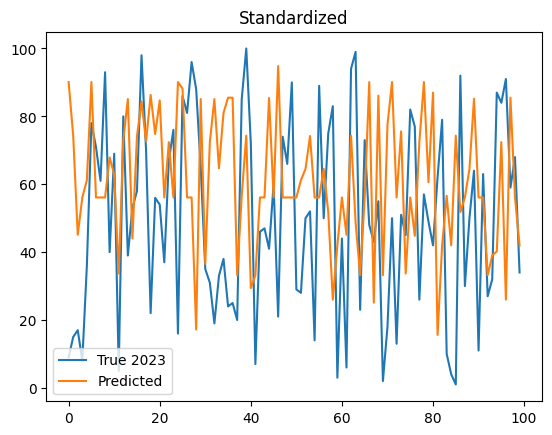

Standardized_LDA
학습 정확도 :  0.656
평균 예측 정확도 0.2420671276037416


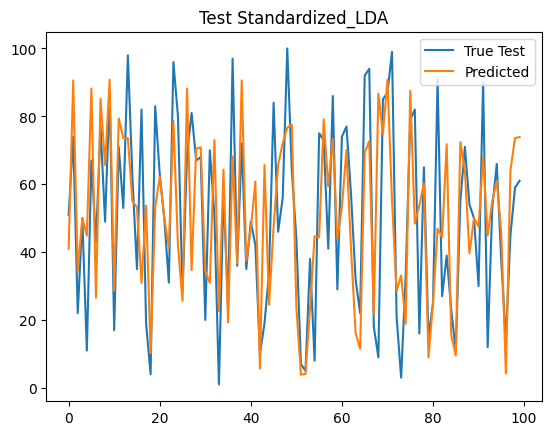

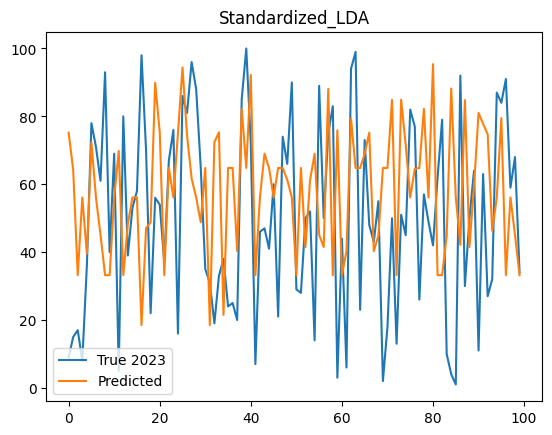

In [32]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 10, 'manhattan')

Standardized
학습 정확도 :  0.581
평균 예측 정확도 0.22419541528355916


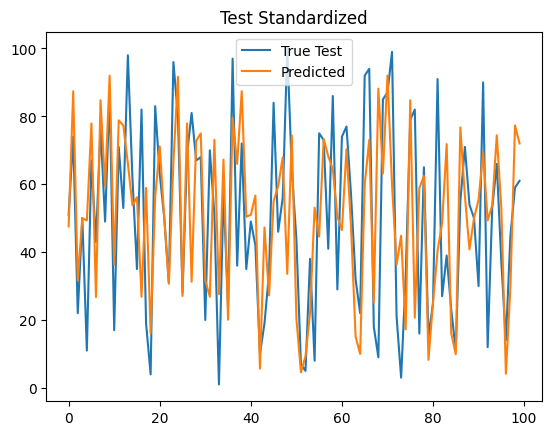

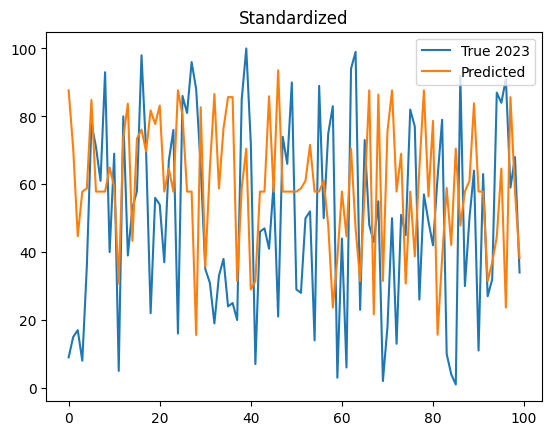

Standardized_LDA
학습 정확도 :  0.58
평균 예측 정확도 0.24077746752775536


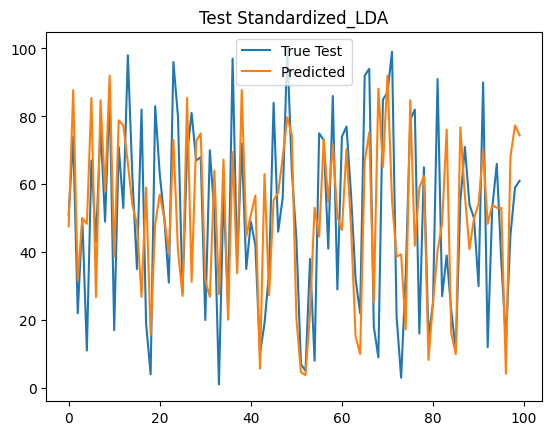

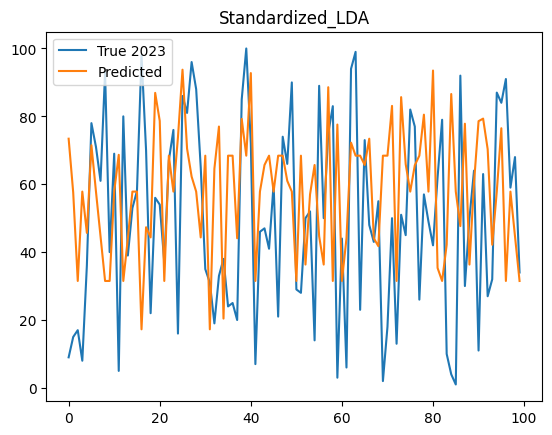

In [33]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 12, 'manhattan')

Standardized
학습 정확도 :  0.881
평균 예측 정확도 0.29292737437456534


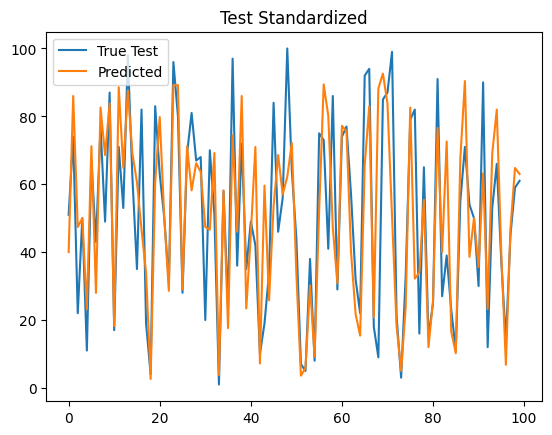

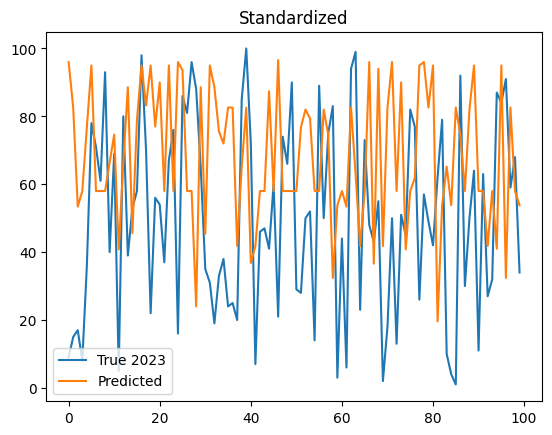

Standardized_LDA
학습 정확도 :  0.881
평균 예측 정확도 0.2922138700750828


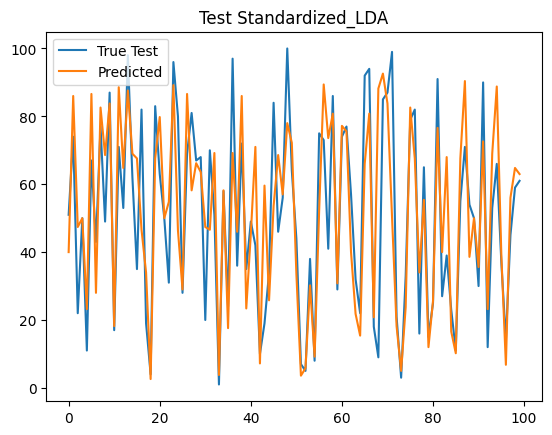

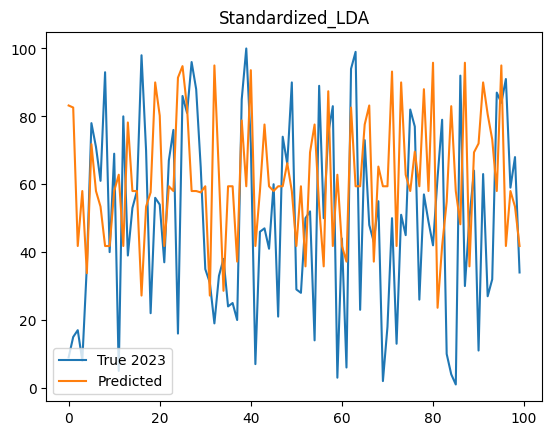

In [35]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 5, 'manhattan')